# Kaggle
## <font color=blue>Full step by step to author </font>
https://www.kaggle.com/code/zohaib123/graduate-admission-prediction-linearregression/notebook
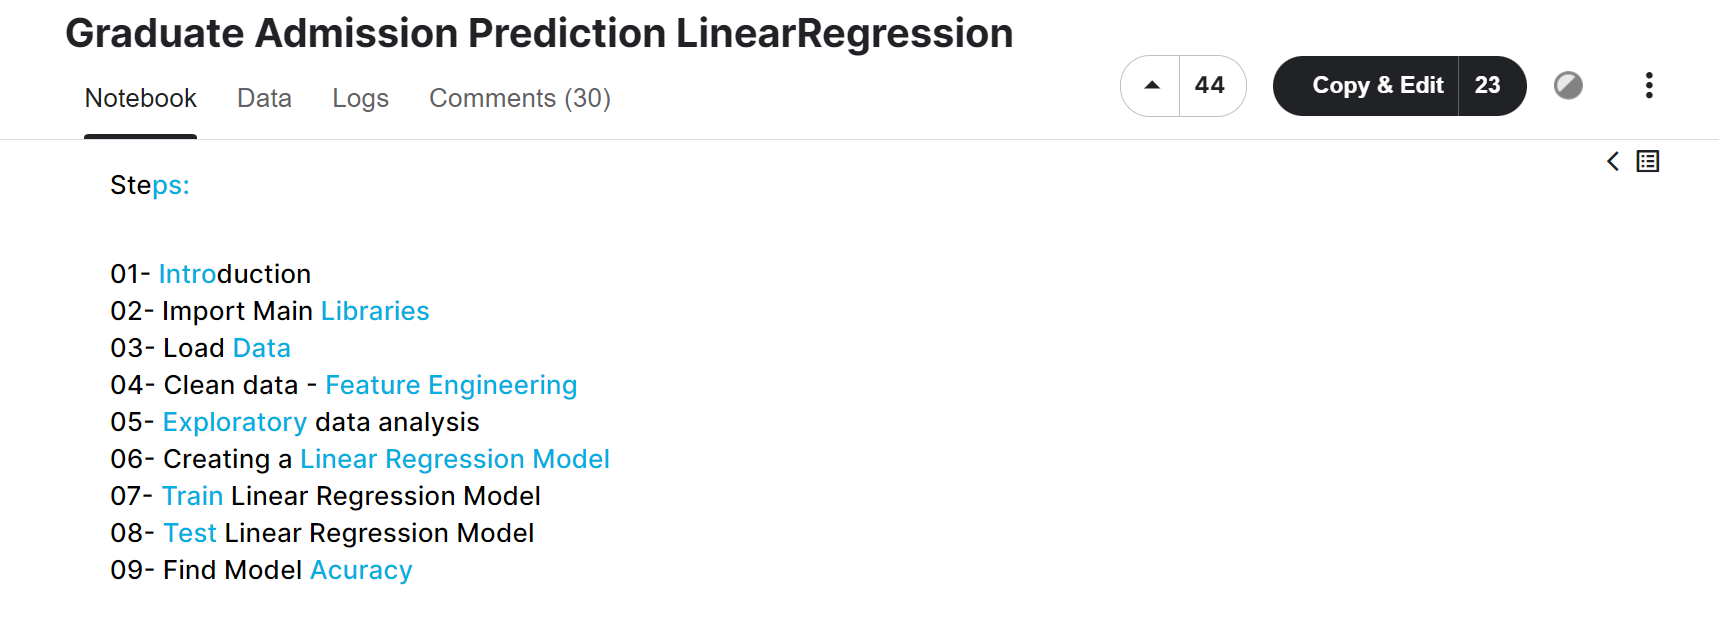

## 02- Import Main Libraries

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## 03- Load Data

In [3]:
data=pd.read_csv("Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 04- Clean data - Feature Engineering

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

* axis = 1 because of its by default axis=0 . 
* axis = 0 means row wise , axis = 1 means column wise ,so here we want to remove a column so we uset axis = 1 .
* inplace = True . mean we want this changing in our main dataset -

In [9]:
data.drop("Serial No.",axis=1,inplace=True)
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## 05- Exploratory data analysis

In [8]:
data.size

4500

* 查看一些基本的統計詳細信息，例如數據幀的百分位數，均值，標準差等或一係列數值。
* percentile:列出像0-1之間的數字的數據類型以返回各自的百分位數
* include:描述 DataFrame 時要包括的數據類型列表。默認為無
* exclude:描述 DataFrame 時要排除的數據類型列表。默認為無

In [10]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


* 兩個變量之間的相關性，取值範圍為[-1,1],取值接近-1，表示反相關，類似反比例函數，取值接近1，表正相關。

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


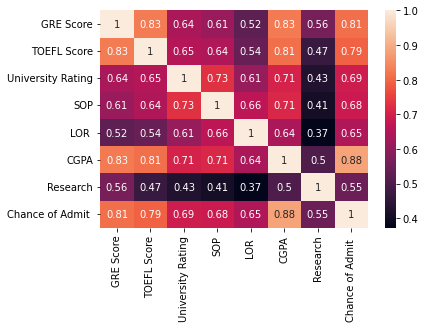

In [15]:
sns.heatmap(data.corr(),annot=True)
data.corr()

### as u can see ['CGPA','GRE Score','TOEFL Score'] are strongly correlated with dependent variable - 'Chance of Admit '

C:\Users\dream\.conda\envs\ai37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

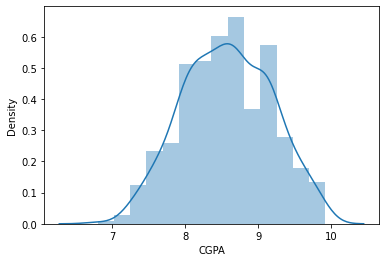

In [18]:
sns.distplot(data["CGPA"])

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

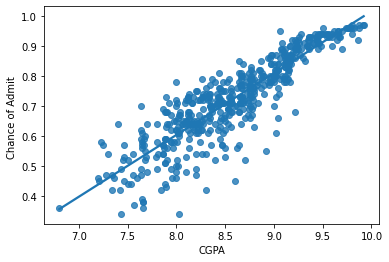

In [21]:
# CGPA VS Chance of Admit
sns.regplot(x="CGPA",y="Chance of Admit ",data=data,ci=None)

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

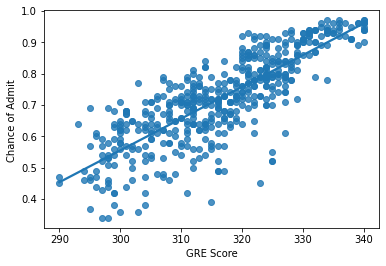

In [23]:
# GRE Score VS Chance of Admit
sns.regplot(x="GRE Score",y="Chance of Admit ",data=data,ci=None)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

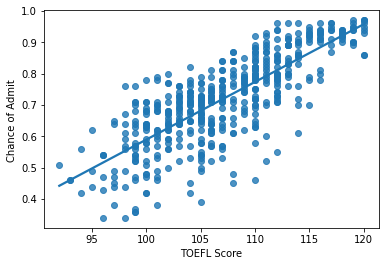

In [24]:
# TOEFL Score VS Chance of Admit
sns.regplot(x="TOEFL Score",y="Chance of Admit ",data=data,ci=None)

## 06- Creating a Linear Regression Model
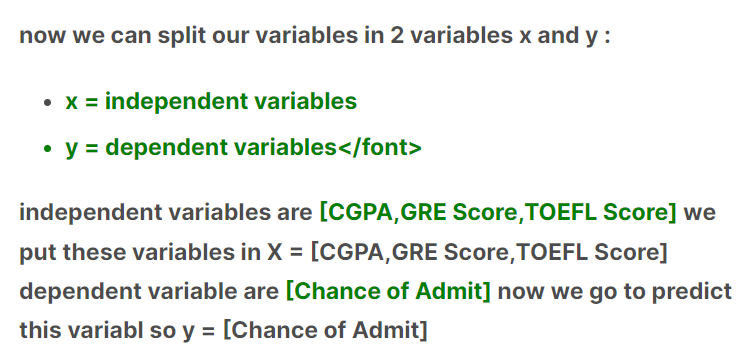

In [25]:
x=data[["CGPA","GRE Score","TOEFL Score"]]
y=data[["Chance of Admit "]]

* Start using
  * from sklearn.linear_model import LinearRegression
  * from sklearn.model_selection import train_test_split
  * import random 
  
#### random_state隨機狀態(Most use random_state=42 )
1、訓練集測試集的劃分
2、構建決策樹
3、構建隨機森林

In [30]:
# 80%當測試集 20%當訓練集
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [32]:
len(x_test)
x_train.shape

(400, 3)

In [33]:
x_train.head()

,CGPA,GRE Score,TOEFL Score
107,9.46,338,117
336,8.79,319,110
71,9.76,336,112
474,7.95,308,105
6,8.20,321,109


## 07- Train Linear Regression Model

In [35]:
# 建立模型
linreg=LinearRegression()
# 將模型放入資料
linreg.fit(x_train,y_train)

LinearRegression()

## 08- Test Linear Regression Model

In [37]:
# model is ready to predict y
y_predict=linreg.predict(x_test)
# model prediction
y_predict[:10]

array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329],
       [0.68293116],
       [0.55296602],
       [0.7583334 ]])

## 09- Find Model Acuracy : Evaluating the performance

In [38]:
#  compare y_predict and y_test
y_test[:10]

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68
15,0.54
316,0.54
489,0.65
159,0.52
153,0.79


* use 【from sklearn import metrics】 for find evaluating the performance
* <font color=red>4% Error Means our Model 96% correct.</font>

In [39]:
metrics.mean_absolute_error(y_test,y_predict)

0.04688621359385711